In [8]:
import pathlib
import tensorflow as tf

# what does untar for?
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = pathlib.Path(tf.keras.utils.get_file('flower_photos', origin = dataset_url, untar = True))

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


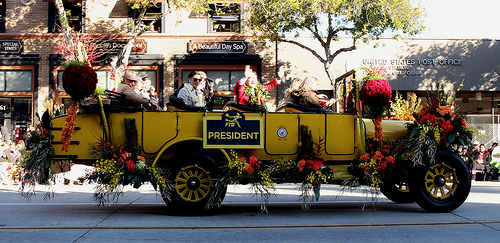

In [10]:
import PIL
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [13]:
# load dataset using keras

batch_size = 32
img_height = 180
img_width = 180

# what does subset for?
train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.2, subset = "training", seed = 123, image_size = (img_height, img_width), batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [15]:
# validation dataset
# 語法相同但自動挑出 validation，是因為 subset 的關係嗎？
validation_dataset = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.2, subset = "validation", seed = 123, image_size = (img_height, img_width), batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [17]:
class_names = train_dataset.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


-----


2024-07-13 15:35:17.131062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


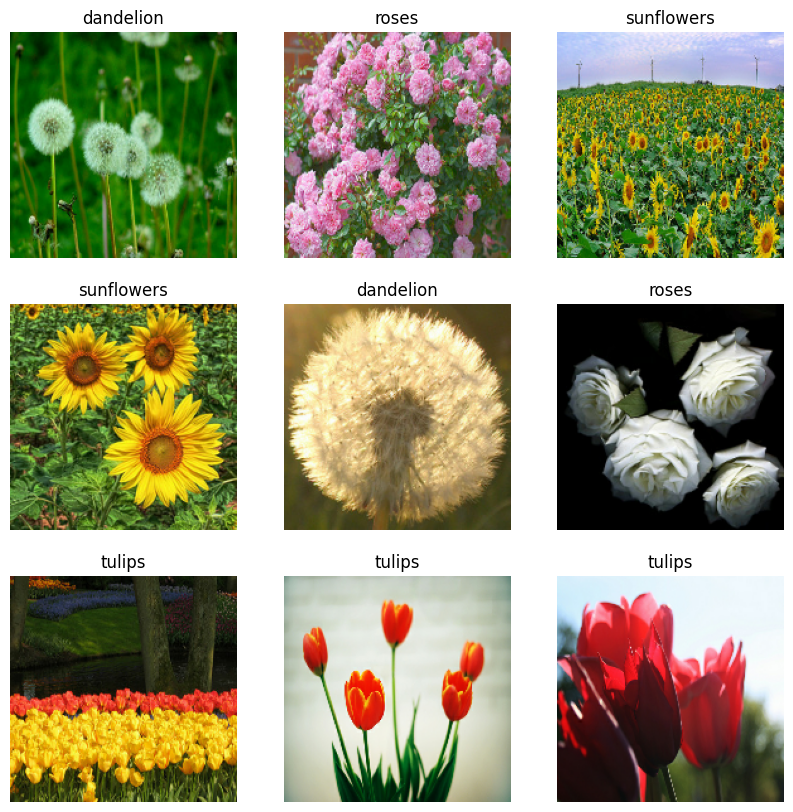

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# what does take method return?
for sample_images, sample_labels in train_dataset.take(1):
  print("-----")
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # why do we need to use numpy and uint8?
    plt.imshow(sample_images[i].numpy().astype("uint8"))
    plt.title(class_names[sample_labels[i]])
    plt.axis("off")